In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

2023-01-26 03:45:04.817520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 03:45:05.347986: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mehathab/anaconda3/envs/corn_dev/lib/python3.8/site-packages/cv2/../../lib64::/home/mehathab/anaconda3/envs/corn_dev/lib/
2023-01-26 03:45:05.348043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /h

In [2]:
dataset_directory = '../Dataset/'
train_directory = dataset_directory+'train/'
valid_directory = dataset_directory+'valid/'

In [3]:
def contrast(img):
    # Contrast Streching
    img = img.astype('uint8')
    original = img.copy()
    xp = [0, 64, 128, 192, 255]
    fp = [0, 16, 128, 240, 255]
    x = np.arange(256)
    table = np.interp(x, xp, fp).astype('uint8')
    img = cv2.LUT(img, table)
    
    return preprocess_input(img)

In [4]:
def colorspace(img):
    image = img.astype("uint8")
    image_converted = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#     image_preprocessed = image_converted / 255
#     image_preprocessed = preprocess_input(image_converted)
    image_preprocessed = contrast(image_converted)
    
    return image_preprocessed.astype('float32')

In [5]:
training = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    height_shift_range=0.2,
    vertical_flip=True,
    width_shift_range=0.2,
    rotation_range=20,
    preprocessing_function=colorspace,
    fill_mode='nearest',)

validation = ImageDataGenerator(
    preprocessing_function=colorspace
)

In [6]:
batch_size = 40
epochs = 100

In [7]:
training_data = training.flow_from_directory(train_directory,
                                            target_size=(299,299),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=True,
                                           )

validating_data = validation.flow_from_directory(valid_directory,
                                               target_size=(299,299),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True,)

Found 30000 images belonging to 3 classes.
Found 3545 images belonging to 3 classes.


In [8]:
training_image , label = training_data.next()
len(training_data) * batch_size

30000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


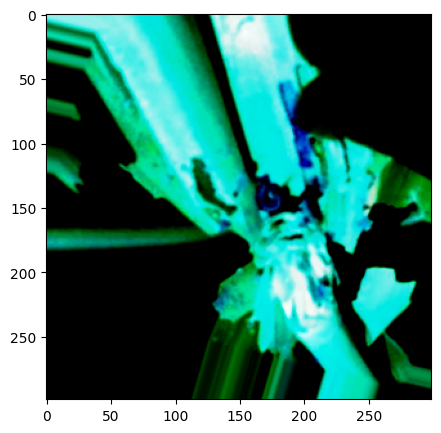

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


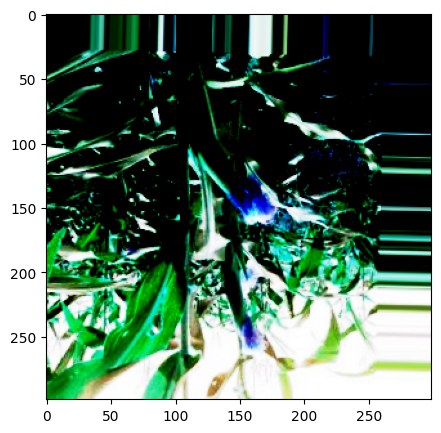

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


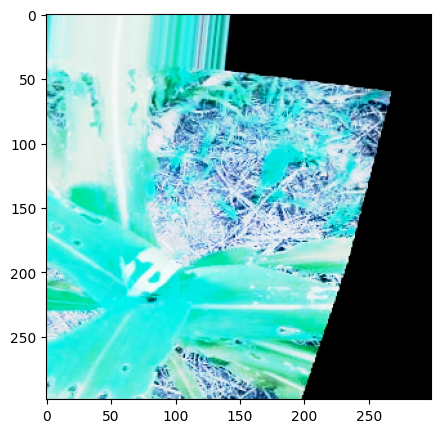

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


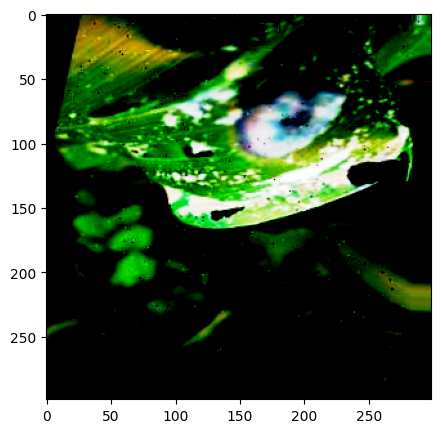

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


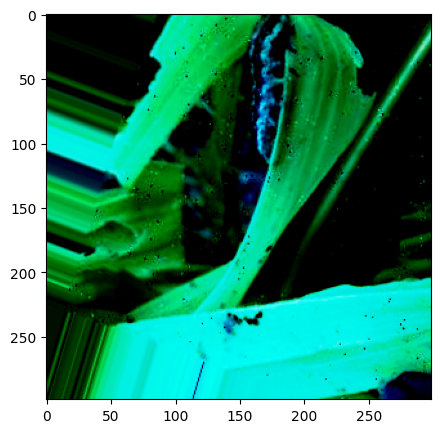

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


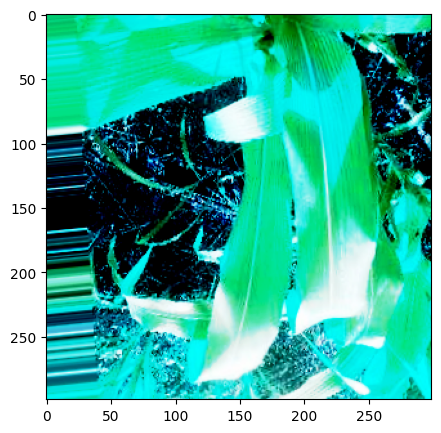

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


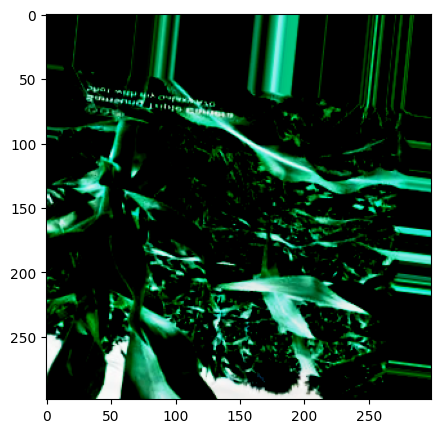

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


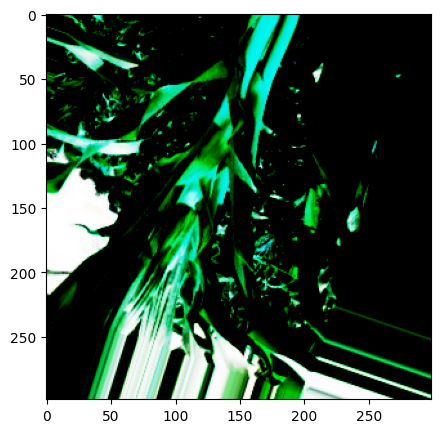

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


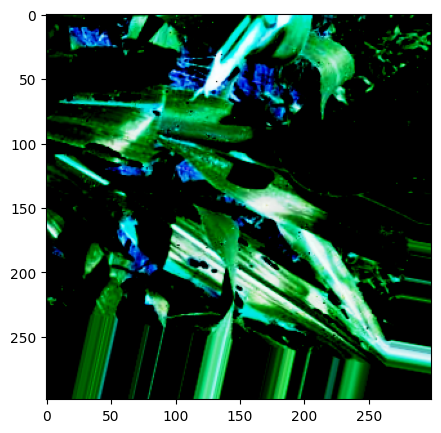

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


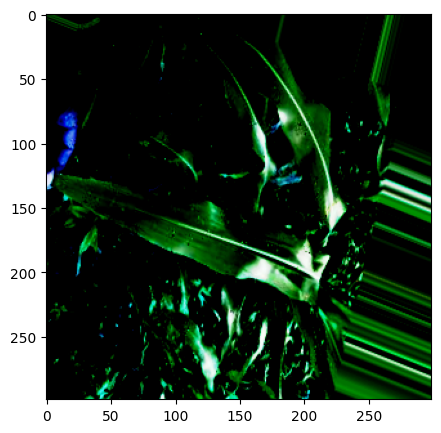

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


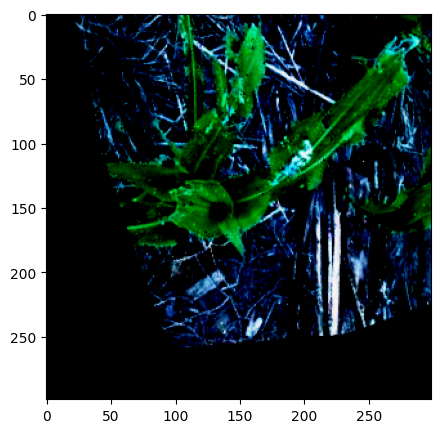

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


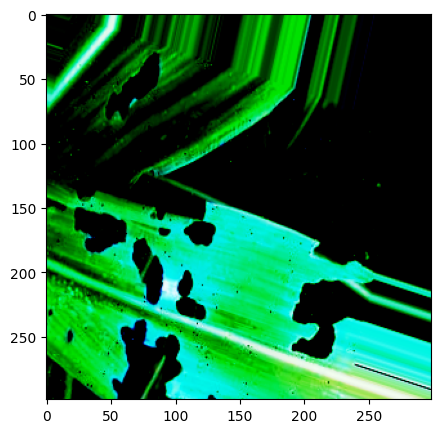

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


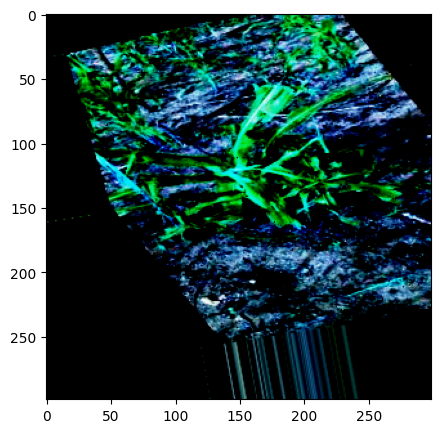

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


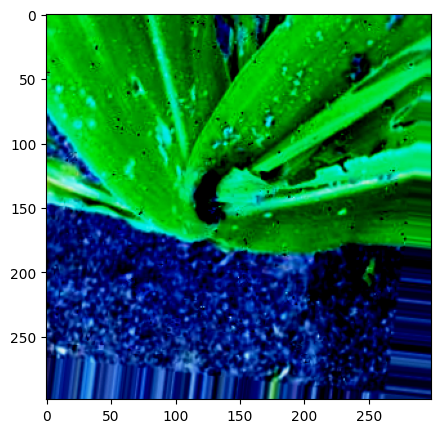

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


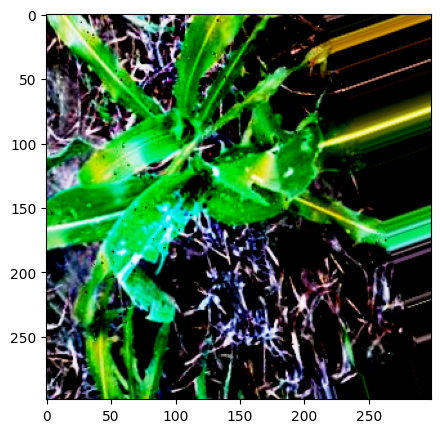

In [9]:
def plot_img(img_arr, label):    
    for i in range(len(img_arr)):
        img = img_arr[i]mc = ModelCheckpoint(filepath=filepath,
                     monitor='val_accuracy', 
                     min_delta=0.01,
                     verbose = 1, save_best_only=True)
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.show()

plot_img(training_image[:15],label[:15])

In [10]:
training_classes_dictionary = training_data.class_indices
classifications = list(training_classes_dictionary.keys())
classifications

['Healthy', 'Non Sprayable', 'Sprayable']

In [11]:
from keras.applications.resnet_v2 import ResNet101V2
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras import optimizers

In [12]:
base_model = ResNet101V2(input_shape=(299,299,3),include_top=False,weights='imagenet',classifier_activation=None)

2023-01-26 03:45:08.789728: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 03:45:08.793413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 03:45:08.793697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 03:45:08.794363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [13]:
print(len(base_model.layers))
# print(base_model.layers[-101].name)
for i in base_model.layers[:-101]:
    i.trainable = False

# # base_model.trainable = False
base_model.summary()

377
Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 305, 305, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                    

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 75, 75, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 75, 75, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 75, 75, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 38, 38, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 38, 38, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 38, 38, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 38, 38, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 19, 19, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 21, 21, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 19, 19, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 19, 19, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 21, 21, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 19, 19, 256)  589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv4_block8_out (Add)         (None, 19, 19, 1024  0           ['conv4_block7_out[0][0]',       
                                )                                 'conv4_block8_3_conv[0][0]']    
                                                                                                  
 conv4_block9_preact_bn (BatchN  (None, 19, 19, 1024  4096       ['conv4_block8_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block9_preact_relu (Acti  (None, 19, 19, 1024  0          ['conv4_block9_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_blo

 conv4_block11_2_pad (ZeroPaddi  (None, 21, 21, 256)  0          ['conv4_block11_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 19, 19, 256)  589824      ['conv4_block11_2_pad[0][0]']    
                                                                                                  
 conv4_block11_2_bn (BatchNorma  (None, 19, 19, 256)  1024       ['conv4_block11_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_2_relu (Activati  (None, 19, 19, 256)  0          ['conv4_block11_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block14_preact_relu (Act  (None, 19, 19, 1024  0          ['conv4_block14_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 19, 19, 256)  262144      ['conv4_block14_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 19, 19, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block16_2_relu (Activati  (None, 19, 19, 256)  0          ['conv4_block16_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_3_conv (Conv2D)  (None, 19, 19, 1024  263168      ['conv4_block16_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block16_out (Add)        (None, 19, 19, 1024  0           ['conv4_block15_out[0][0]',      
                                )                                 'conv4_block16_3_conv[0][0]']   
          

                                                                                                  
 conv4_block19_1_bn (BatchNorma  (None, 19, 19, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 19, 19, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_pad (ZeroPaddi  (None, 21, 21, 256)  0          ['conv4_block19_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_blo

                                )                                                                 
                                                                                                  
 conv4_block21_out (Add)        (None, 19, 19, 1024  0           ['conv4_block20_out[0][0]',      
                                )                                 'conv4_block21_3_conv[0][0]']   
                                                                                                  
 conv4_block22_preact_bn (Batch  (None, 19, 19, 1024  4096       ['conv4_block21_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block22_preact_relu (Act  (None, 19, 19, 1024  0          ['conv4_block22_preact_bn[0][0]']
 ivation)                       )                                                                 
          

                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 10, 10, 512)  0          ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_2_pad (ZeroPaddin  (None, 12, 12, 512)  0          ['conv5_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 10, 10, 512)  2359296     ['conv5_block1_2_pad[0][0]']     
                                                                                                  
 conv5_block1_2_bn (BatchNormal  (None, 10, 10, 512)  2048       ['conv5_block1_2_conv[0][0]']    
 ization) 

                                )                                                                 
                                                                                                  
 conv5_block3_out (Add)         (None, 10, 10, 2048  0           ['conv5_block2_out[0][0]',       
                                )                                 'conv5_block3_3_conv[0][0]']    
                                                                                                  
 post_bn (BatchNormalization)   (None, 10, 10, 2048  8192        ['conv5_block3_out[0][0]']       
                                )                                                                 
                                                                                                  
 post_relu (Activation)         (None, 10, 10, 2048  0           ['post_bn[0][0]']                
                                )                                                                 
          

In [14]:
flatten = GlobalAveragePooling2D()(base_model.output)

fc1 = Dense(units=4096, activation='relu')(flatten)
dropout = Dropout(0.5)(fc1)
batch1 = BatchNormalization()(dropout)
fc2 = Dense(units=1024, activation='relu')(batch1)
dropout = Dropout(0.7)(fc2)
batch2 = BatchNormalization()(dropout)


predictions = Dense(units=3, activation='softmax')(batch2)

In [15]:
model = Model(base_model.input, predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 305, 305, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 75, 75, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 75, 75, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 75, 75, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 38, 38, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 38, 38, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 38, 38, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 38, 38, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 19, 19, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 21, 21, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 19, 19, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 19, 19, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 21, 21, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 19, 19, 256)  589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv4_block8_out (Add)         (None, 19, 19, 1024  0           ['conv4_block7_out[0][0]',       
                                )                                 'conv4_block8_3_conv[0][0]']    
                                                                                                  
 conv4_block9_preact_bn (BatchN  (None, 19, 19, 1024  4096       ['conv4_block8_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block9_preact_relu (Acti  (None, 19, 19, 1024  0          ['conv4_block9_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_blo

 conv4_block11_2_pad (ZeroPaddi  (None, 21, 21, 256)  0          ['conv4_block11_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 19, 19, 256)  589824      ['conv4_block11_2_pad[0][0]']    
                                                                                                  
 conv4_block11_2_bn (BatchNorma  (None, 19, 19, 256)  1024       ['conv4_block11_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_2_relu (Activati  (None, 19, 19, 256)  0          ['conv4_block11_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block14_preact_relu (Act  (None, 19, 19, 1024  0          ['conv4_block14_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 19, 19, 256)  262144      ['conv4_block14_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 19, 19, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block16_2_relu (Activati  (None, 19, 19, 256)  0          ['conv4_block16_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_3_conv (Conv2D)  (None, 19, 19, 1024  263168      ['conv4_block16_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block16_out (Add)        (None, 19, 19, 1024  0           ['conv4_block15_out[0][0]',      
                                )                                 'conv4_block16_3_conv[0][0]']   
          

                                                                                                  
 conv4_block19_1_bn (BatchNorma  (None, 19, 19, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 19, 19, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_pad (ZeroPaddi  (None, 21, 21, 256)  0          ['conv4_block19_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_blo

                                )                                                                 
                                                                                                  
 conv4_block21_out (Add)        (None, 19, 19, 1024  0           ['conv4_block20_out[0][0]',      
                                )                                 'conv4_block21_3_conv[0][0]']   
                                                                                                  
 conv4_block22_preact_bn (Batch  (None, 19, 19, 1024  4096       ['conv4_block21_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block22_preact_relu (Act  (None, 19, 19, 1024  0          ['conv4_block22_preact_bn[0][0]']
 ivation)                       )                                                                 
          

                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 10, 10, 512)  0          ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_2_pad (ZeroPaddin  (None, 12, 12, 512)  0          ['conv5_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 10, 10, 512)  2359296     ['conv5_block1_2_pad[0][0]']     
                                                                                                  
 conv5_block1_2_bn (BatchNormal  (None, 10, 10, 512)  2048       ['conv5_block1_2_conv[0][0]']    
 ization) 

                                )                                                                 
                                                                                                  
 conv5_block3_out (Add)         (None, 10, 10, 2048  0           ['conv5_block2_out[0][0]',       
                                )                                 'conv5_block3_3_conv[0][0]']    
                                                                                                  
 post_bn (BatchNormalization)   (None, 10, 10, 2048  8192        ['conv5_block3_out[0][0]']       
                                )                                                                 
                                                                                                  
 post_relu (Activation)         (None, 10, 10, 2048  0           ['post_bn[0][0]']                
                                )                                                                 
          

In [16]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.0001),
#                momentum=0.9, decay=0.005
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

##EarlyStopping

es = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=35, verbose=1)

## Model Checkpoint
filepath = '../best_weights/Resn101_BGR+Contrast_model1.hdf5'

mc = ModelCheckpoint(filepath=filepath,
                     monitor='val_accuracy', 
                     min_delta=0.01,
                     verbose = 1, save_best_only=True)

filepath1 = '../best_normal_weights/Resn101_BGR+Contrast_model1.hdf5'
mc1 = ModelCheckpoint(filepath=filepath1,
                     monitor='accuracy', 
                     min_delta=0.01,
                     verbose = 1, save_best_only=True)

cb = [es, mc, mc1]
# cb = [mc]
training_len = training_data.samples
validating_len = validating_data.samples

In [ ]:
import time

start = time.perf_counter()

# model.load_weights('../best_weights/Resn101_BGR+Contrast_model1.hdf5')

history = model.fit_generator(
    training_data,
    steps_per_epoch=len(training_data),
    epochs=epochs,
    verbose=1,
    callbacks=cb,
    validation_data=validating_data,
    validation_steps=len(validating_data)
)

stop = time.perf_counter()

/tmp/ipykernel_26903/1873027426.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100


2023-01-26 03:45:17.596139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-01-26 03:45:17.976957: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-26 03:45:17.977452: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-26 03:45:17.977467: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-01-26 03:45:17.977849: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-26 03:45:17.977888: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-26 03:45:18.585920:

750/750 [==============================] - ETA: 0s - loss: 0.7274 - accuracy: 0.6843
Epoch 1: val_accuracy improved from -inf to 0.81128, saving model to ../best_weights/Resn101_BGR+Contrast_model1.hdf5

Epoch 1: accuracy improved from -inf to 0.68430, saving model to ../best_normal_weights/Resn101_BGR+Contrast_model1.hdf5
750/750 [==============================] - 807s 1s/step - loss: 0.7274 - accuracy: 0.6843 - val_loss: 0.4330 - val_accuracy: 0.8113
Epoch 2/100
750/750 [==============================] - ETA: 0s - loss: 0.4824 - accuracy: 0.7864
Epoch 2: val_accuracy improved from 0.81128 to 0.81890, saving model to ../best_weights/Resn101_BGR+Contrast_model1.hdf5

Epoch 2: accuracy improved from 0.68430 to 0.78640, saving model to ../best_normal_weights/Resn101_BGR+Contrast_model1.hdf5
750/750 [==============================] - 809s 1s/step - loss: 0.4824 - accuracy: 0.7864 - val_loss: 0.3997 - val_accuracy: 0.8189
Epoch 3/100
750/750 [==============================] - ETA: 0s - los


Epoch 19: accuracy improved from 0.96323 to 0.96527, saving model to ../best_normal_weights/Resn101_BGR+Contrast_model1.hdf5
750/750 [==============================] - 825s 1s/step - loss: 0.0916 - accuracy: 0.9653 - val_loss: 0.3260 - val_accuracy: 0.9013
Epoch 20/100
750/750 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.9646
Epoch 20: val_accuracy did not improve from 0.90127

Epoch 20: accuracy did not improve from 0.96527
750/750 [==============================] - 826s 1s/step - loss: 0.0951 - accuracy: 0.9646 - val_loss: 0.3338 - val_accuracy: 0.8993
Epoch 21/100
750/750 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9698
Epoch 21: val_accuracy improved from 0.90127 to 0.90353, saving model to ../best_weights/Resn101_BGR+Contrast_model1.hdf5

Epoch 21: accuracy improved from 0.96527 to 0.96983, saving model to ../best_normal_weights/Resn101_BGR+Contrast_model1.hdf5
750/750 [==============================] - 828s 1s/step - loss: 0

750/750 [==============================] - 837s 1s/step - loss: 0.0426 - accuracy: 0.9852 - val_loss: 0.3806 - val_accuracy: 0.9083
Epoch 40/100
750/750 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9856
Epoch 40: val_accuracy did not improve from 0.91086

Epoch 40: accuracy improved from 0.98537 to 0.98557, saving model to ../best_normal_weights/Resn101_BGR+Contrast_model1.hdf5
750/750 [==============================] - 837s 1s/step - loss: 0.0415 - accuracy: 0.9856 - val_loss: 0.3741 - val_accuracy: 0.9066
Epoch 41/100
750/750 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9861
Epoch 41: val_accuracy did not improve from 0.91086

Epoch 41: accuracy improved from 0.98557 to 0.98607, saving model to ../best_normal_weights/Resn101_BGR+Contrast_model1.hdf5
750/750 [==============================] - 836s 1s/step - loss: 0.0380 - accuracy: 0.9861 - val_loss: 0.3793 - val_accuracy: 0.9080
Epoch 42/100
750/750 [==============================

In [ ]:
print("Time Taken:",(stop-start))
hist_dict = pd.DataFrame(history.history)

# hist_json_file = 'history.json' 
# with open(hist_json_file, mode='w') as f:
#     hist_dict.to_json(f)
    
hist_csv_file = '../history/hist_BGR+Contrast_model1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_dict.to_csv(f)

In [ ]:
model.save("../models/Resn101_BGR+Contrast_model1.hdf5")
model.save_weights("../weights/Resn101_BGR+Contrast_model1.hdf5")

In [ ]:
# History Plotting
hist = pd.read_csv('../history/hist_BGR+Contrast_model1.csv')mc = ModelCheckpoint(filepath=filepath,
                     monitor='val_accuracy', 
                     min_delta=0.01,
                     verbose = 1, save_best_only=True)

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epoch = history.epoch

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(epoch,acc,label="Accuracy")
plt.plot(epoch,val_acc,label='Val_Accuracy')
plt.legend(prop={'size':15})
plt.title("ResNet101_BGR+Contrast_Model1_Accuracy",size=25)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(epoch,loss,label="Loss")
plt.plot(epoch,val_loss,label='Val_Loss')
plt.legend(prop={'size':15})
plt.title("Reset101_BGR+Contrast_Model1_Loss",size=25)
plt.show()